In [1]:
from RooPandasFunctions import PSequential,PColumn,PFilter,PRow,PProcessor,PProcRunner,PInitDir
import pandas as pd
from glob import glob
from ROOT import TH1F,TH2F,TLorentzVector,TFile,TCanvas,TLegend,gPad,THStack
from collections import OrderedDict
import numpy as np
import copy

Welcome to JupyROOT 6.22/00


In [2]:
FromFlatPandas = TFile("FromFlatPandas_AE90_Mall_Njet3.root")
njet = 3

In [3]:
for f in FromFlatPandas.GetListOfKeys():
    print(f.GetName())
    #if(f.GetName().split("__")[0]=="QCD_HT1000to1500"):
    #    print(f.GetName().split("__")[1].split("_"))

QCD_HT1000to1500__ht_LT03
QCD_HT1000to1500__pt0_LT03
QCD_HT1000to1500__ptTIGHT0_LT03
QCD_HT1000to1500__ptLOOSE0_LT03
QCD_HT1000to1500__pt1_LT03
QCD_HT1000to1500__ptTIGHT1_LT03
QCD_HT1000to1500__ptLOOSE1_LT03
QCD_HT1000to1500__pt2_LT03
QCD_HT1000to1500__ptTIGHT2_LT03
QCD_HT1000to1500__ptLOOSE2_LT03
QCD_HT1000to1500__ptL0_E0
QCD_HT1000to1500__ptT0_E0
QCD_HT1000to1500__ptL0_E1
QCD_HT1000to1500__ptT0_E1
QCD_HT1000to1500__ptL0_E2
QCD_HT1000to1500__ptT0_E2
QCD_HT1000to1500__ptL0_E3
QCD_HT1000to1500__ptT0_E3
QCD_HT1000to1500__ht_LT12
QCD_HT1000to1500__pt0_LT12
QCD_HT1000to1500__ptTIGHT0_LT12
QCD_HT1000to1500__ptLOOSE0_LT12
QCD_HT1000to1500__pt1_LT12
QCD_HT1000to1500__ptTIGHT1_LT12
QCD_HT1000to1500__ptLOOSE1_LT12
QCD_HT1000to1500__pt2_LT12
QCD_HT1000to1500__ptTIGHT2_LT12
QCD_HT1000to1500__ptLOOSE2_LT12
QCD_HT1000to1500__ptL1_E0
QCD_HT1000to1500__ptT1_E0
QCD_HT1000to1500__ptL1_E1
QCD_HT1000to1500__ptT1_E1
QCD_HT1000to1500__ptL1_E2
QCD_HT1000to1500__ptT1_E2
QCD_HT1000to1500__ptL1_E3
QCD_HT1000to

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


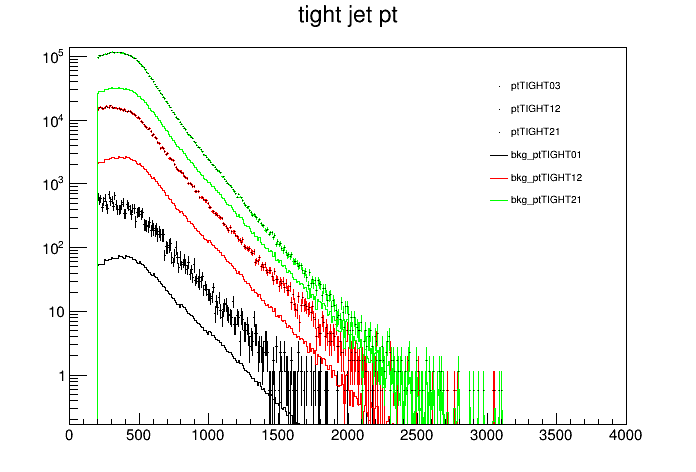

In [9]:
arr=[]
for f in FromFlatPandas.GetListOfKeys():
    try:
        if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
            if("ptTIGHT" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
                for i in range(njet+1):
                    if(str(i)+str(njet-i) in f.GetName().split("__")[1].split("_")[1]):
                        arr.append(f.GetName().split("__")[1].split("_")[1])
    except Exception as e: print(e)
arrs = set(arr)
print(arrs)

ptTIGHT={"0":[],"1":[],"2":[],"3":[]}
ptTIGHTsums0=TH1F("ptTIGHT03","ptTIGHT03",1000,0,10000)
ptTIGHTsums1=TH1F("ptTIGHT12","ptTIGHT12",1000,0,10000)
ptTIGHTsums2=TH1F("ptTIGHT21","ptTIGHT21",1000,0,10000)
ptTIGHTsums3=TH1F("ptTIGHT30","ptTIGHT30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
        if("ptTIGHT" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
            for i in range(njet+1):
                if(f.GetName().split("__")[1].split("_")[1][2] == str(i)):
                    ptTIGHT[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in ptTIGHT[str(i)]:
        if i == 0:
            #print(j)
            ptTIGHTsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            ptTIGHTsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            ptTIGHTsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            ptTIGHTsums3 += FromFlatPandas.Get(j)

bkg_ptTIGHT={"0":[],"1":[],"2":[],"3":[]}
bkg_ptTIGHTsums0=TH1F("bkg_ptTIGHT03","bkg_ptTIGHT03",1000,0,10000)
bkg_ptTIGHTsums1=TH1F("bkg_ptTIGHT12","bkg_ptTIGHT12",1000,0,10000)
bkg_ptTIGHTsums2=TH1F("bkg_ptTIGHT21","bkg_ptTIGHT21",1000,0,10000)
bkg_ptTIGHTsums3=TH1F("bkg_ptTIGHT30","bkg_ptTIGHT30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
        if("ptTIGHT" in f.GetName() and ("bkg" in f.GetName().split("__")[1].split("_")[0])):
            for i in range(njet+1):
                if(f.GetName().split("__")[1].split("_")[2][2] == str(i)):
                    bkg_ptTIGHT[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in bkg_ptTIGHT[str(i)]:
        if i == 0:
            #print(j)
            bkg_ptTIGHTsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            bkg_ptTIGHTsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            bkg_ptTIGHTsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            bkg_ptTIGHTsums3 += FromFlatPandas.Get(j)

canv=TCanvas("canv","canv",700,500)

ptTIGHTsums0.SetTitle("tight jet pt")
ptTIGHTsums0.SetStats(0)
ptTIGHTsums0.GetXaxis().SetRangeUser(0,4000)
ptTIGHTsums0.SetMaximum(1.2*max(max(ptTIGHTsums0),max(ptTIGHTsums1),max(ptTIGHTsums2),max(bkg_ptTIGHTsums0),max(bkg_ptTIGHTsums1),max(bkg_ptTIGHTsums2)))

ptTIGHTsums0.SetLineColor(1)
ptTIGHTsums1.SetLineColor(2)
ptTIGHTsums2.SetLineColor(3)

bkg_ptTIGHTsums0.SetLineColor(1)
bkg_ptTIGHTsums1.SetLineColor(2)
bkg_ptTIGHTsums2.SetLineColor(3)

ptTIGHTsums0.Draw()
ptTIGHTsums1.Draw("same")
ptTIGHTsums2.Draw("same")
bkg_ptTIGHTsums0.Draw("histsame")
bkg_ptTIGHTsums1.Draw("histsame")
bkg_ptTIGHTsums2.Draw("histsame")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptTIGHTsums0,'ptTIGHT03','P')
leg1.AddEntry(ptTIGHTsums1,'ptTIGHT12','P')
leg1.AddEntry(ptTIGHTsums2,'ptTIGHT21','P')
leg1.AddEntry(bkg_ptTIGHTsums0,'bkg_ptTIGHT01','L')
leg1.AddEntry(bkg_ptTIGHTsums1,'bkg_ptTIGHT12','L')
leg1.AddEntry(bkg_ptTIGHTsums2,'bkg_ptTIGHT21','L')
leg1.Draw()

canv.RedrawAxis()
canv.SetLogy()
canv.Draw()

{'LT12', 'LT30', 'LT03', 'LT21'}


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


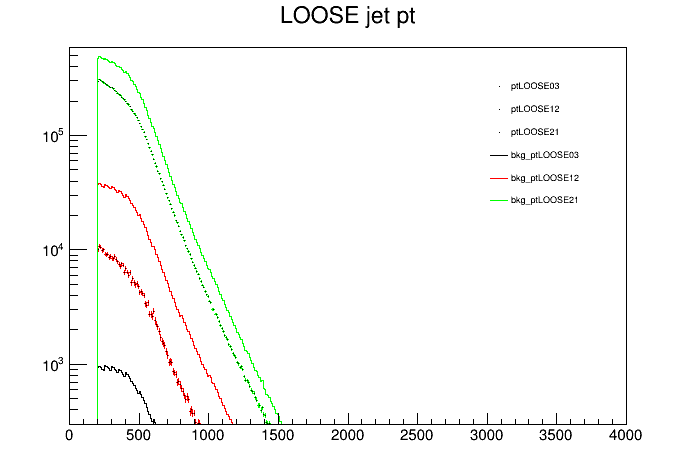

In [13]:
arr=[]
for f in FromFlatPandas.GetListOfKeys():
    try:
        if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
            if("ptLOOSE" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
                for i in range(njet+1):
                    if(str(i)+str(njet-i) in f.GetName().split("__")[1].split("_")[1]):
                        arr.append(f.GetName().split("__")[1].split("_")[1])
    except Exception as e: print(e)
arrs = set(arr)
print(arrs)

ptLOOSE={"0":[],"1":[],"2":[],"3":[]}
ptLOOSEsums0=TH1F("ptLOOSE03","ptLOOSE03",1000,0,10000)
ptLOOSEsums1=TH1F("ptLOOSE12","ptLOOSE12",1000,0,10000)
ptLOOSEsums2=TH1F("ptLOOSE21","ptLOOSE21",1000,0,10000)
ptLOOSEsums3=TH1F("ptLOOSE30","ptLOOSE30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
        if("ptLOOSE" in f.GetName() and not ("bkg" in f.GetName().split("__")[1].split("_")[0])):
            for i in range(njet+1):
                if(f.GetName().split("__")[1].split("_")[1][2] == str(i)):
                    ptLOOSE[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in ptLOOSE[str(i)]:
        if i == 0:
            #print(j)
            ptLOOSEsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            ptLOOSEsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            ptLOOSEsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            ptLOOSEsums3 += FromFlatPandas.Get(j)

bkg_ptLOOSE={"0":[],"1":[],"2":[],"3":[]}
bkg_ptLOOSEsums0=TH1F("bkg_ptLOOSE03","bkg_ptLOOSE03",1000,0,10000)
bkg_ptLOOSEsums1=TH1F("bkg_ptLOOSE12","bkg_ptLOOSE12",1000,0,10000)
bkg_ptLOOSEsums2=TH1F("bkg_ptLOOSE21","bkg_ptLOOSE21",1000,0,10000)
bkg_ptLOOSEsums3=TH1F("bkg_ptLOOSE30","bkg_ptLOOSE30",1000,0,10000)

for f in FromFlatPandas.GetListOfKeys():
    if(("QCD" in f.GetName().split("__")[0]) and not ("htQCD" in f.GetName().split("__")[0])):
        if("ptLOOSE" in f.GetName() and ("bkg" in f.GetName().split("__")[1].split("_")[0])):
            for i in range(njet+1):
                if(f.GetName().split("__")[1].split("_")[2][2] == str(i)):
                    bkg_ptLOOSE[str(i)].append(f.GetName())

for i in range(njet+1):
    for j in bkg_ptLOOSE[str(i)]:
        if i == 0:
            #print(j)
            bkg_ptLOOSEsums0 += FromFlatPandas.Get(j)
        if i == 1:
            #print(j)
            bkg_ptLOOSEsums1 += FromFlatPandas.Get(j)
        if i == 2:
            #print(j)
            bkg_ptLOOSEsums2 += FromFlatPandas.Get(j)
        if i == 3:
            #print(j)
            bkg_ptLOOSEsums3 += FromFlatPandas.Get(j)

canv=TCanvas("canv","canv",700,500)

ptLOOSEsums0.SetTitle("LOOSE jet pt")
ptLOOSEsums0.SetStats(0)
ptLOOSEsums0.GetXaxis().SetRangeUser(0,4000)
ptLOOSEsums0.SetMaximum(1.2*max(max(ptLOOSEsums0),max(ptLOOSEsums1),max(ptLOOSEsums2),max(bkg_ptLOOSEsums0),max(bkg_ptLOOSEsums1),max(bkg_ptLOOSEsums2)))

ptLOOSEsums0.SetLineColor(1)
ptLOOSEsums1.SetLineColor(2)
ptLOOSEsums2.SetLineColor(3)

bkg_ptLOOSEsums0.SetLineColor(1)
bkg_ptLOOSEsums1.SetLineColor(2)
bkg_ptLOOSEsums2.SetLineColor(3)

ptLOOSEsums0.Draw()
ptLOOSEsums1.Draw("same")
ptLOOSEsums2.Draw("same")
bkg_ptLOOSEsums0.Draw("histsame")
bkg_ptLOOSEsums1.Draw("histsame")
bkg_ptLOOSEsums2.Draw("histsame")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptLOOSEsums0,'ptLOOSE03','P')
leg1.AddEntry(ptLOOSEsums1,'ptLOOSE12','P')
leg1.AddEntry(ptLOOSEsums2,'ptLOOSE21','P')
leg1.AddEntry(bkg_ptLOOSEsums0,'bkg_ptLOOSE03','L')
leg1.AddEntry(bkg_ptLOOSEsums1,'bkg_ptLOOSE12','L')
leg1.AddEntry(bkg_ptLOOSEsums2,'bkg_ptLOOSE21','L')
leg1.Draw()

canv.RedrawAxis()
canv.SetLogy()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


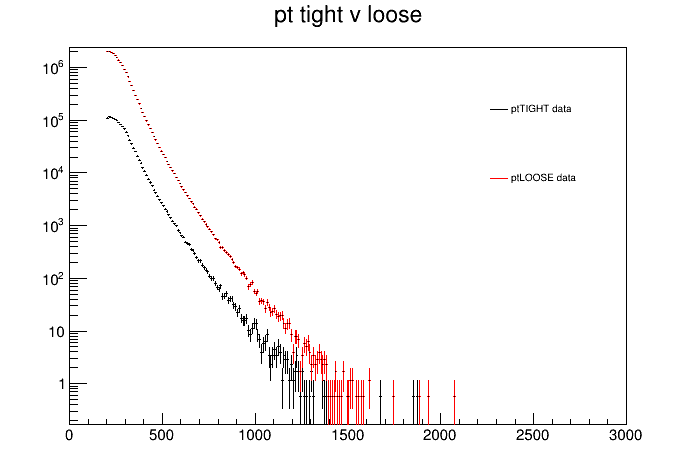

In [87]:
ptTIGHT = FromFlatPandas.QCD_HT1000to1500__ptTIGHT + FromFlatPandas.QCD_HT1500to2000__ptTIGHT + FromFlatPandas.QCD_HT2000toInf__ptTIGHT
ptLOOSE = FromFlatPandas.QCD_HT1000to1500__ptLOOSE + FromFlatPandas.QCD_HT1500to2000__ptLOOSE + FromFlatPandas.QCD_HT2000toInf__ptLOOSE

canv=TCanvas("canv","canv",700,500)

ptTIGHT.SetTitle("pt tight v loose")
ptTIGHT.SetStats(0)
ptTIGHT.GetXaxis().SetRangeUser(0,3000)
ptTIGHT.SetMaximum(1.2*max(max(ptTIGHT),max(ptLOOSE)))
ptTIGHT.SetLineColor(1)
ptLOOSE.SetLineColor(2)

ptTIGHT.Draw()
ptLOOSE.Draw("same")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(ptTIGHT,'ptTIGHT data','L')
leg1.AddEntry(ptLOOSE,'ptLOOSE data','L')
leg1.Draw()

canv.SetLogy()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


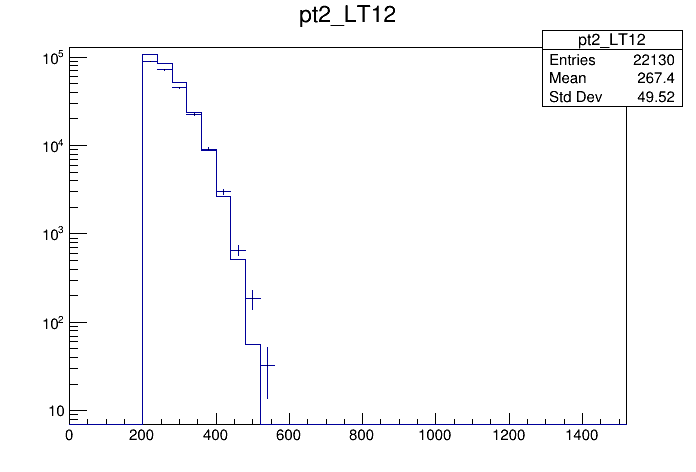

In [32]:
canv=TCanvas("canv","canv",700,500)
FromFlatPandas.QCD_HT1000to1500__pt2_LT12.Rebin(4)
FromFlatPandas.QCD_HT1000to1500__bkg_pt2_LT12.Rebin(4)
FromFlatPandas.QCD_HT1000to1500__pt2_LT12.GetXaxis().SetRangeUser(0,1500)
FromFlatPandas.QCD_HT1000to1500__pt2_LT12.SetMaximum(1.2*max(max(FromFlatPandas.QCD_HT1000to1500__pt2_LT12),max(FromFlatPandas.QCD_HT1000to1500__bkg_pt2_LT12)))
FromFlatPandas.QCD_HT1000to1500__pt2_LT12.Draw()
FromFlatPandas.QCD_HT1000to1500__bkg_pt2_LT12.Draw("histsame")
canv.SetLogy()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


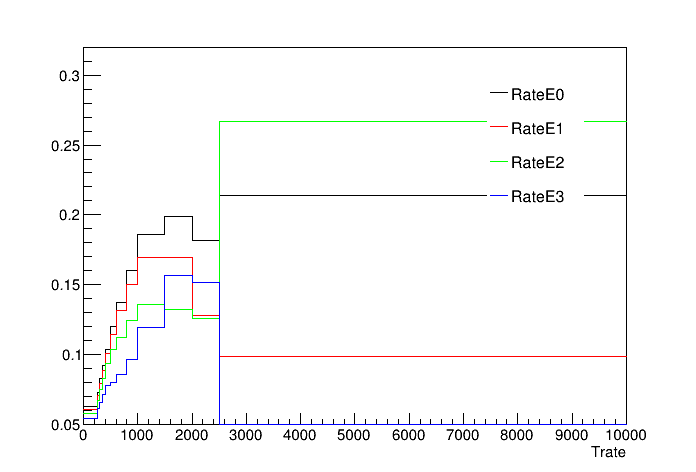

In [33]:
canv=TCanvas("canv","canv",700,500)

FromFlatPandas.RateE0.SetTitle(";Trate;")
FromFlatPandas.RateE0.SetStats(0)
FromFlatPandas.RateE0.SetMaximum(max(max(FromFlatPandas.RateE0),max(FromFlatPandas.RateE1),max(FromFlatPandas.RateE2),max(FromFlatPandas.RateE3))*1.2)

FromFlatPandas.RateE0.SetLineColor(1)
FromFlatPandas.RateE1.SetLineColor(2)
FromFlatPandas.RateE2.SetLineColor(3)
FromFlatPandas.RateE3.SetLineColor(4)

FromFlatPandas.RateE0.Draw("hist")
FromFlatPandas.RateE1.Draw("histsame")
FromFlatPandas.RateE2.Draw("histsame")
FromFlatPandas.RateE3.Draw("histsame")

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(FromFlatPandas.RateE0,'RateE0','L')
leg1.AddEntry(FromFlatPandas.RateE1,'RateE1','L')
leg1.AddEntry(FromFlatPandas.RateE2,'RateE2','L')
leg1.AddEntry(FromFlatPandas.RateE3,'RateE3','L')
leg1.Draw()

gPad.SetLeftMargin(0.12)
canv.Draw()

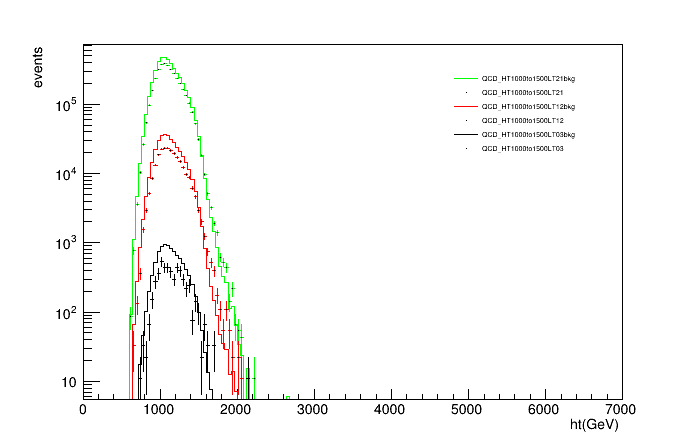

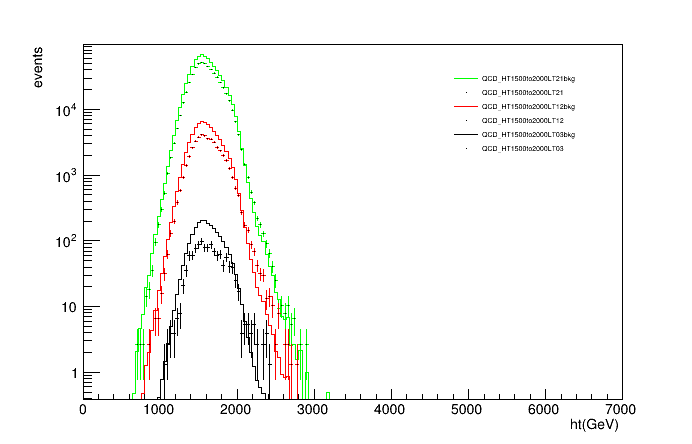

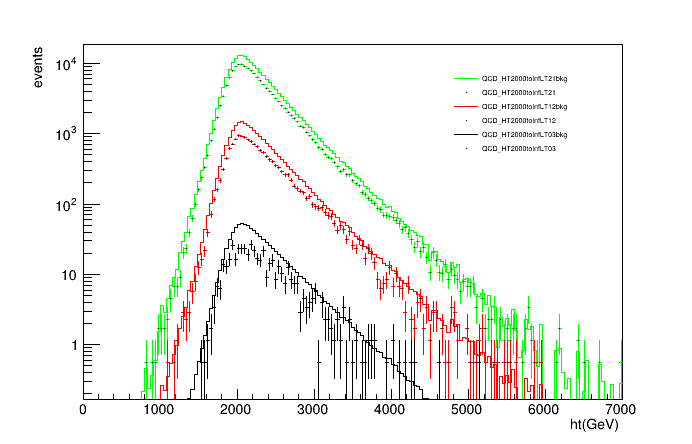

In [10]:
FromFlatPandas.htQCD_HT1000to1500.Draw("hist")
FromFlatPandas.htQCD_HT1500to2000.Draw("hist")
FromFlatPandas.htQCD_HT2000toInf.Draw("hist")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


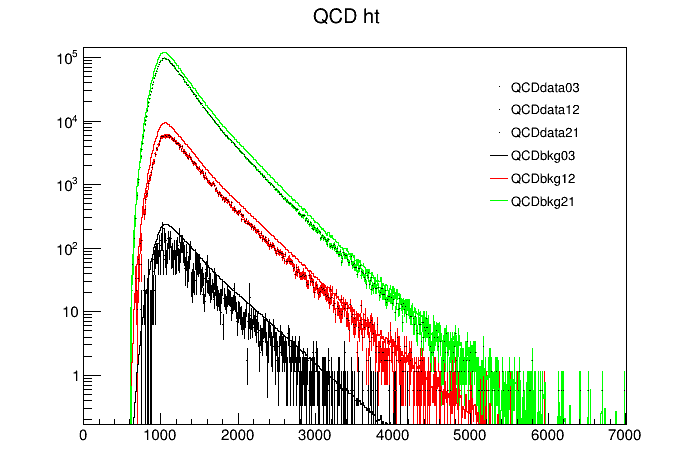

In [11]:
QCDdata03 = FromFlatPandas.QCD_HT1000to1500__ht_LT03 + FromFlatPandas.QCD_HT1500to2000__ht_LT03 + FromFlatPandas.QCD_HT2000toInf__ht_LT03
QCDdata12 = FromFlatPandas.QCD_HT1000to1500__ht_LT12 + FromFlatPandas.QCD_HT1500to2000__ht_LT12 + FromFlatPandas.QCD_HT2000toInf__ht_LT12
QCDdata21 = FromFlatPandas.QCD_HT1000to1500__ht_LT21 + FromFlatPandas.QCD_HT1500to2000__ht_LT21 + FromFlatPandas.QCD_HT2000toInf__ht_LT21

QCDbkg03 = FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT03 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT03 + FromFlatPandas.QCD_HT2000toInf__bkg_ht_LT03
QCDbkg12 = FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT12 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT12 + FromFlatPandas.QCD_HT2000toInf__bkg_ht_LT12
QCDbkg21 = FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT21 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT21 + FromFlatPandas.QCD_HT2000toInf__bkg_ht_LT21

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

QCDdata03.SetTitle("QCD ht;;")
QCDdata03.SetStats(0)
QCDdata03.SetMaximum(max(max(QCDdata03),max(QCDdata12),max(QCDdata21),max(QCDbkg03),max(QCDbkg12),max(QCDbkg21))*1.2)
QCDdata03.GetXaxis().SetRangeUser(0,10000)


QCDdata03.SetLineColor(1)
QCDdata12.SetLineColor(2)
QCDdata21.SetLineColor(3)
QCDdata03.Draw("same")
canv.Update()
QCDdata12.Draw("same")
canv.Update()
QCDdata21.Draw("same")
canv.Update()

QCDbkg03.SetLineColor(1)
QCDbkg12.SetLineColor(2)
QCDbkg21.SetLineColor(3)
QCDbkg03.Draw("histsame")
canv.Update()
QCDbkg12.Draw("histsame")
canv.Update()
QCDbkg21.Draw("histsame")
canv.Update()

canv.SetLogy()

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)

leg1.AddEntry(QCDdata03,'QCDdata03','P')
leg1.AddEntry(QCDdata12,'QCDdata12','P')
leg1.AddEntry(QCDdata21,'QCDdata21','P')

leg1.AddEntry(QCDbkg03,'QCDbkg03','L')
leg1.AddEntry(QCDbkg12,'QCDbkg12','L')
leg1.AddEntry(QCDbkg21,'QCDbkg21','L')

leg1.Draw()

canv.RedrawAxis()
canv.Update()
canv.Draw()

In [36]:
QCDdata03.Rebin(4)
QCDbkg03.Rebin(4)
QCDdata12.Rebin(4)
QCDbkg12.Rebin(4)
QCDdata21.Rebin(4)
QCDbkg21.Rebin(4)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


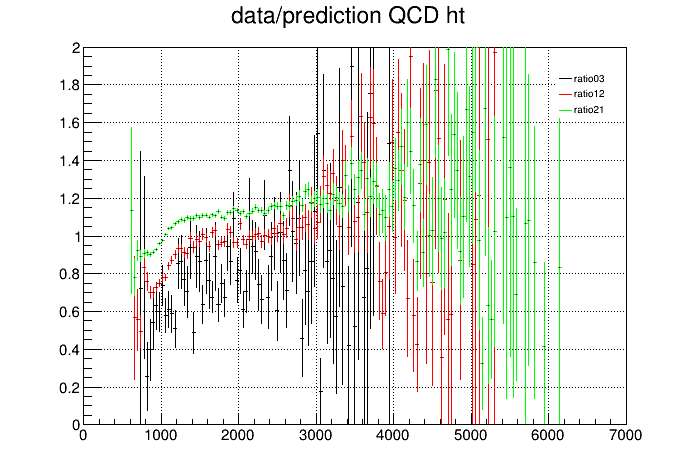

In [37]:
ratio03 = QCDdata03/QCDbkg03
ratio12 = QCDdata12/QCDbkg12
ratio21 = QCDdata21/QCDbkg21

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

ratio03.SetTitle("data/prediction QCD ht;;")
ratio03.SetStats(0)
ratio03.SetMaximum(2)
ratio03.SetMinimum(0)

ratio03.SetLineColor(1)
ratio12.SetLineColor(2)
ratio21.SetLineColor(3)
ratio03.Draw("P")
ratio12.Draw("same")
ratio21.Draw("same")

#canv.SetLogy()

leg1 = TLegend(0.80, 0.75, 0.90, 0.85)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)

leg1.AddEntry(ratio03,'ratio03','L')
leg1.AddEntry(ratio12,'ratio12','L')
leg1.AddEntry(ratio21,'ratio21','L')

leg1.Draw()

canv.SetGrid()
canv.RedrawAxis()
canv.Update()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


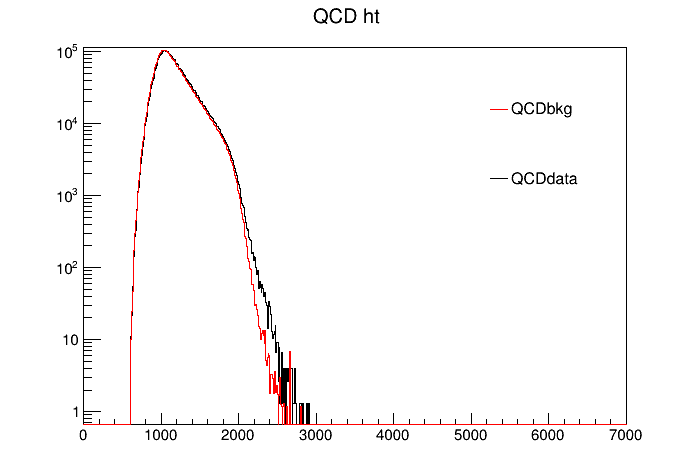

In [38]:
QCD15002000bkg = FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT03 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT12 + FromFlatPandas.QCD_HT1500to2000__bkg_ht_LT21
QCD10001500bkg = FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT03 + FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT12 + FromFlatPandas.QCD_HT1000to1500__bkg_ht_LT21
QCD15002000 = FromFlatPandas.QCD_HT1500to2000__ht_LT03 + FromFlatPandas.QCD_HT1500to2000__ht_LT12 + FromFlatPandas.QCD_HT1500to2000__ht_LT21
QCD10001500 = FromFlatPandas.QCD_HT1000to1500__ht_LT03 + FromFlatPandas.QCD_HT1000to1500__ht_LT12 + FromFlatPandas.QCD_HT1000to1500__ht_LT21

QCDdata = QCD10001500 + QCD15002000
QCDbkg = QCD10001500bkg + QCD15002000bkg

canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)

QCDdata.SetTitle("QCD ht;;")
QCDdata.SetStats(0)
QCDdata.SetMaximum(max(max(QCDdata),max(QCDbkg))*1.1)

QCDdata.SetLineColor(1)
QCDdata.Draw("hist")

QCDbkg.SetLineColor(2)
QCDbkg.Draw("histsame")

canv.SetLogy()

leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(QCDbkg,'QCDbkg','l')
leg1.AddEntry(QCDdata,'QCDdata','l')
leg1.Draw()

canv.Draw()

In [39]:
canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)
FromFlatPandas.QCD_HT1500to2000__dijetht.SetTitle("QCD_HT1500to2000;ht;eventratio")
FromFlatPandas.QCD_HT1500to2000__dijetht.SetStats(0)
norm = 1/FromFlatPandas.QCD_HT1500to2000__dijetht.Integral()
FromFlatPandas.QCD_HT1500to2000__dijetht.Scale(norm)
FromFlatPandas.QCD_HT1500to2000__dijetht.Draw("hist")
canv.Draw()

AttributeError: <class cppyy.gbl.TFile at 0x560df0dbfe00> object has no attribute 'QCD_HT1500to2000__dijetht'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


In [ ]:
canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)
FromFlatPandas.TT__dijetht.SetTitle("TT;ht;eventratio")
FromFlatPandas.TT__dijetht.SetStats(0)
norm = 1/FromFlatPandas.TT__dijetht.Integral()
FromFlatPandas.TT__dijetht.Scale(norm)
FromFlatPandas.TT__dijetht.Draw("hist")
canv.Draw()

In [ ]:
canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)
FromFlatPandas.QCD_HT1500to2000__ht20.SetTitle("QCD_HT1500to2000;ht;eventratio")
FromFlatPandas.QCD_HT1500to2000__ht20.SetStats(0)
norm = 1/FromFlatPandas.QCD_HT1500to2000__ht20.Integral()
FromFlatPandas.QCD_HT1500to2000__ht20.Scale(norm)
FromFlatPandas.QCD_HT1500to2000__ht20.SetLineColor(1)
FromFlatPandas.QCD_HT1500to2000__ht20.Draw("hist")
norm = 1/FromFlatPandas.QCD_HT1500to2000__ht02.Integral()
FromFlatPandas.QCD_HT1500to2000__ht02.Scale(norm)
FromFlatPandas.QCD_HT1500to2000__ht02.SetLineColor(2)
FromFlatPandas.QCD_HT1500to2000__ht02.Draw("histsame")
QCDHT11Scaled = FromFlatPandas.QCD_HT1500to2000__ht11
norm = 1/QCDHT11Scaled.Integral()
QCDHT11Scaled.Scale(norm)
QCDHT11Scaled.SetLineColor(3)
QCDHT11Scaled.Draw("histsame")
leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(FromFlatPandas.QCD_HT1500to2000__ht20, '2tight,0loose', 'l')
leg1.AddEntry(FromFlatPandas.QCD_HT1500to2000__ht02, '0tight,2loose', 'l')
leg1.AddEntry(QCDHT11Scaled, '1tight,1loose', 'l')
leg1.Draw()
canv.Draw()

In [ ]:
canv=TCanvas("canv","canv",700,500)
gPad.SetLeftMargin(0.12)
FromFlatPandas.TT__ht20.SetTitle("TT;ht;eventratio")
FromFlatPandas.TT__ht20.SetStats(0)
norm = 1/FromFlatPandas.TT__ht20.Integral()
FromFlatPandas.TT__ht20.Scale(norm)
FromFlatPandas.TT__ht20.SetLineColor(1)
FromFlatPandas.TT__ht20.Draw("hist")
norm = 1/FromFlatPandas.TT__ht02.Integral()
FromFlatPandas.TT__ht02.Scale(norm)
FromFlatPandas.TT__ht02.SetLineColor(2)
FromFlatPandas.TT__ht02.Draw("histsame")
norm = 1/FromFlatPandas.TT__ht11.Integral()
FromFlatPandas.TT__ht11.Scale(norm)
FromFlatPandas.TT__ht11.SetLineColor(3)
FromFlatPandas.TT__ht11.Draw("histsame")
leg1 = TLegend(0.70, 0.55, 0.84, 0.84)
leg1.SetFillColor(0)
leg1.SetBorderSize(0)
leg1.AddEntry(FromFlatPandas.TT__ht20, '2tight,0loose', 'l')
leg1.AddEntry(FromFlatPandas.TT__ht02, '0tight,2loose', 'l')
leg1.AddEntry(FromFlatPandas.TT__ht11, '1tight,1loose', 'l')
leg1.Draw()
canv.Draw()